In [1]:
'''
1.数据准备模块：
导入所需库。
'''

%pylab inline
import numpy as np
import pylab as pl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import svm

In [3]:
'''
1.数据准备模块：

加载数据集（iris）。
选取数据集的前两个特征作为输入特征X，并将目标标签y设置为类别。
'''

svc = svm.SVC(kernel='linear')
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:

'''
2.支持向量机模型训练模块：

使用线性核函数初始化一个SVM分类器。
使用训练数据X和目标标签y对SVM模型进行训练。
'''

svc.fit(X, y)

SVC(kernel='linear')

In [5]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


'''
3.可视化函数模块：

plot_estimator()函数的作用是可视化分类器的预测结果与原始标签。
该函数首先根据输入的分类器和数据对分类器进行训练，然后生成网格节点，并在这些节点上进行预测，最后使用色块对预测结果进行可视化。
同时，原始训练样本也被上色并绘制在图中。
函数在可视化时设置了边界、网格、坐标轴和紧凑布局。
'''
def plot_estimator(estimator, X, y):
    '''
    这个函数的作用是基于分类器，对预测结果与原始标签进行可视化
    '''
    
    estimator.fit(X, y)
    # 确定网格最大最小值作为边界
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # 产生网络节点
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # 基于分离器，对网格节点做预测
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # 对预测结果上色
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    # 同时对原始训练样本上色
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

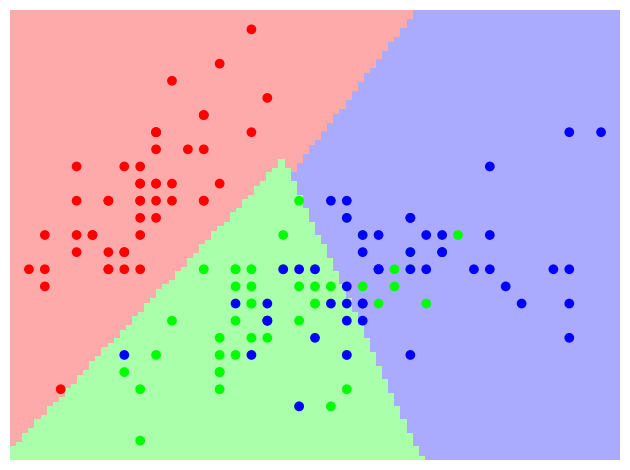

In [6]:
'''
4.结果展示模块：

通过plot_estimator()函数展示了不同参数设置下SVM模型的分类效果，并且标注了支持向量。
首先是默认参数下的SVM分类结果。
然后尝试使用线性核函数的LinearSVC，展示其分类效果。
接着，通过设置不同的正则化参数C，展示了模型在高C值和低C值下的分类效果，以及支持向量的数量差异。
最后，每个图的标题都提供了对图形的简要描述。
'''

plot_estimator(svc, X, y)

D:\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


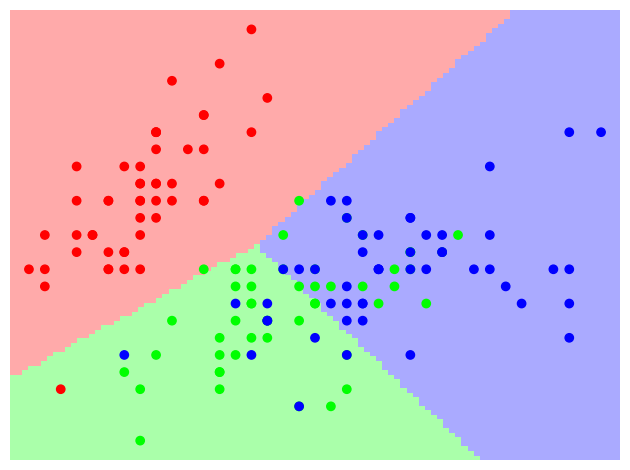

In [7]:
plot_estimator(svm.LinearSVC(), X, y)

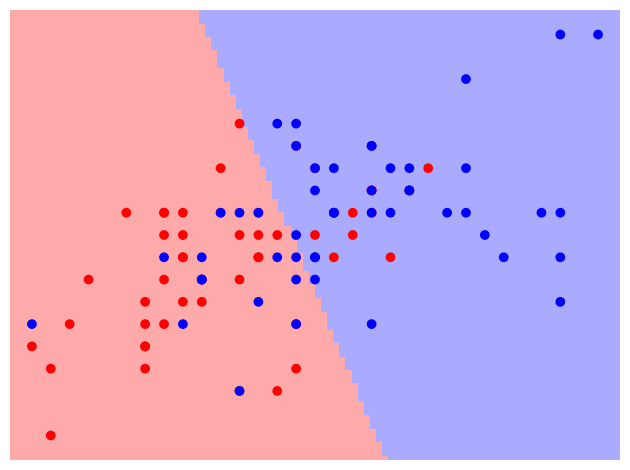

In [8]:
X, y = X[np.in1d(y, [1,2])], y[np.in1d(y, [1, 2])]
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 80, 
          facecolors = 'none', zorder = 10)

Text(0.5, 1.0, 'Low C values: high number of support vectors')

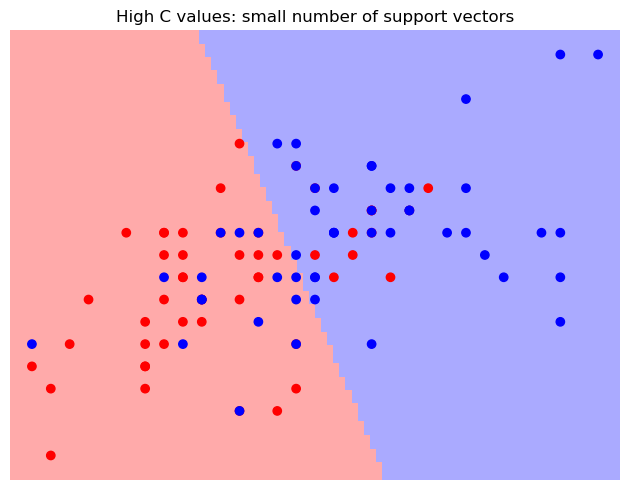

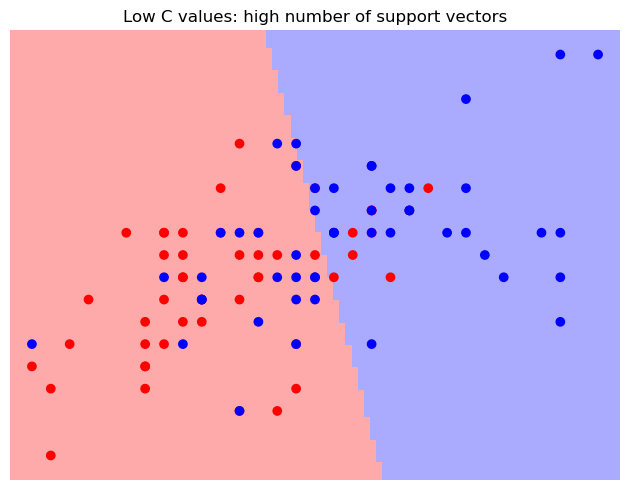

In [9]:
svc = svm.SVC(kernel='linear', C=1e3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 80, 
          facecolors = 'none', zorder = 10)
pl.title("High C values: small number of support vectors")

svc = svm.SVC(kernel='linear', C=1e-3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 80, 
          facecolors = 'none', zorder = 10)
pl.title("Low C values: high number of support vectors")